# Aplying Machine Learning on DNA Sequencing

In this projects, a classification model is applied to predict gene's function based on the DNA sequence of the coding sequence alone.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
human_data = pd.read_table("human_data.txt")
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


### Data is from human DNA sequence coding regions and a class label. 

In [33]:
chimp_data = pd.read_table('chimp_data.txt')
dog_data = pd.read_table('dog_data.txt')
# chimp_data.head()
# dog_data.head()

# Define a Function to Collect All Possible Overlapping K-mers of a Specified Length from any Sequence String. We apply the K-mers to the complete sequences

In [34]:
# Function to convert sequence strings into k-mer words, default size=6(hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]
    

Now we can convert our training data sequences into short overlapping k-mers of legth 6. Lets do that for each species of data we have using our getKmers function.


In [35]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)


In [36]:
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6 and ready for the next step. Let's take a look.

In [9]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels. 

In [17]:
human_texts = list(human_data['words'])
print(len(human_texts))
human_texts[1]

4380


['atgaac',
 'tgaacg',
 'gaacga',
 'aacgaa',
 'acgaaa',
 'cgaaaa',
 'gaaaat',
 'aaaatc',
 'aaatct',
 'aatctg',
 'atctgt',
 'tctgtt',
 'ctgttc',
 'tgttcg',
 'gttcgc',
 'ttcgct',
 'tcgctt',
 'cgcttc',
 'gcttca',
 'cttcat',
 'ttcatt',
 'tcattc',
 'cattca',
 'attcat',
 'ttcatt',
 'tcattg',
 'cattgc',
 'attgcc',
 'ttgccc',
 'tgcccc',
 'gccccc',
 'ccccca',
 'ccccac',
 'cccaca',
 'ccacaa',
 'cacaat',
 'acaatc',
 'caatcc',
 'aatcct',
 'atccta',
 'tcctag',
 'cctagg',
 'ctaggc',
 'taggcc',
 'aggcct',
 'ggccta',
 'gcctac',
 'cctacc',
 'ctaccc',
 'tacccg',
 'acccgc',
 'cccgcc',
 'ccgccg',
 'cgccgc',
 'gccgca',
 'ccgcag',
 'cgcagt',
 'gcagta',
 'cagtac',
 'agtact',
 'gtactg',
 'tactga',
 'actgat',
 'ctgatc',
 'tgatca',
 'gatcat',
 'atcatt',
 'tcattc',
 'cattct',
 'attcta',
 'ttctat',
 'tctatt',
 'ctattt',
 'tatttc',
 'atttcc',
 'tttccc',
 'ttcccc',
 'tccccc',
 'ccccct',
 'cccctc',
 'ccctct',
 'cctcta',
 'ctctat',
 'tctatt',
 'ctattg',
 'tattga',
 'attgat',
 'ttgatc',
 'tgatcc',
 'gatccc',
 'atcccc',

In [18]:
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])

In [21]:
human_data.iloc[:, 0]

0       4
1       4
2       3
3       3
4       3
       ..
4375    0
4376    6
4377    6
4378    6
4379    6
Name: class, Length: 4380, dtype: int64

In [42]:
y_data = human_data.iloc[:, 0].values    

We will perform the same steps for chimpanzee and dog

In [44]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)

In [39]:
print(X.shape)

(4380, 232414)


If we have a look at class balance, we can see we have relatively balanced datasets.

<AxesSubplot:>

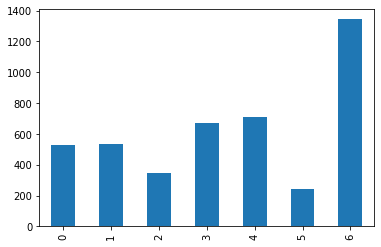

In [43]:
human_data['class'].value_counts().sort_index().plot.bar();

In [45]:
# Splitting the human datasets into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_data, 
                                                    test_size = 0.20, 
                                                    random_state=42)


In [46]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


A multinomial naive Bayes classifier will be created. I previously did some parameter tuning and found the bgram size of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best.

In [47]:
### Multinomial Naive Bayes Classifier ###
# The alpha parameter was determined by grid search previously
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [48]:
y_pred = classifier.predict(X_test)

# Model Performance Metrics:
The model performance metrics here are confusion matrix, accuracy, precision, recall and f1score. Since the results on overseen data is good, it shows that model didnot overfit into the training data. 

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984
